In [6]:
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import locale
locale.setlocale(locale.LC_ALL, '') 
%matplotlib inline

## Please set these parameters

In [7]:
accountname = '2024_Umsatzliste' # set filename of the csv

# 0 or less means analyse all months
number_of_last_months_to_analyse = 12

### Read csv
Works for DKB csv as of 2022-12-31.

In [8]:
csv_file= accountname+".csv"
headerSize = 4
data = pd.read_csv(csv_file, index_col='Buchungsdatum',
# data = pd.read_csv(csv_file,
                   header=headerSize, sep=',', quoting=1, parse_dates=True, dayfirst=True)
print(data.head())

              Wertstellung   Status Zahlungspflichtige*r  \
Buchungsdatum                                              
2024-10-24        24.10.24  Gebucht     Paul Kohlschmidt   
2024-10-24        24.10.24  Gebucht               ISSUER   
2024-10-24        24.10.24  Gebucht               ISSUER   
2024-10-24        24.10.24  Gebucht               ISSUER   
2024-10-24        24.10.24  Gebucht               ISSUER   

                        Zahlungsempfänger*in        Verwendungszweck  \
Buchungsdatum                                                          
2024-10-24                Christoph Gerhardt               Sky, DAZN   
2024-10-24                   H.M.DE0673/BONN  VISA Debitkartenumsatz   
2024-10-24       RESTAURANT..THE.PROTEA/BONN  VISA Debitkartenumsatz   
2024-10-24                      TK.Maxx/Bonn  VISA Debitkartenumsatz   
2024-10-24     KAUFLAND.ILMENAU.4380/ILMENAU  VISA Debitkartenumsatz   

              Umsatztyp                    IBAN Betrag (€) Gläubiger-ID  \

In [9]:
# # Read metadata
with open(csv_file,"r") as f:
    reader = csv.reader(f)
    metadata = {}
    for i, row in enumerate(reader):
        if i<3:
            if "Kontostand" in row[0]:
                end_balance = float(row[1][:-2].replace(".","").replace(",","."))

end_date = datetime.strptime(data.iloc[0][0],"%d.%m.%y").date()
start_date = datetime.strptime(data.iloc[-1][0],"%d.%m.%y").date()

In [10]:
print("start:",start_date)
print("end:",end_date)
print("end balance:",end_balance)

start: 2024-01-02
end: 2024-10-24
end balance: 3440.13


## Named Columns

In [11]:
party = "Zahlungsempfänger*in"
category = "Kategorie"
amount = "Betrag (€)"
cause = "Verwendungszweck"
posting_text = "Verwendungszweck"
balance = "Kontostand (EUR)"

### Cleanup

In [12]:
# Fix US / EU decimal-point/comma
print(data[amount])
data[amount] = data[amount].str.replace('.','')
data[amount] = data[amount].str.replace(',','.')
data[amount] = data[amount].astype('float')

# avoid nan being interpreted as float in specific columns
data[party] = data[party].astype(str)
data[cause] = data[cause].astype(str)
data[posting_text] = data[posting_text].astype(str)

Buchungsdatum
2024-10-24         31
2024-10-24     -29,98
2024-10-24        -25
2024-10-24     -15,98
2024-10-24    -219,52
               ...   
2024-01-02      57,96
2024-01-02     -14,91
2024-01-02      -6,99
2024-01-02       -334
2024-01-02       -350
Name: Betrag (€), Length: 1041, dtype: object


/tmp/ipykernel_5679/188290710.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[amount] = data[amount].str.replace('.','')


In [13]:
data.head()

,Wertstellung,Status,Zahlungspflichtige*r,Zahlungsempfänger*in,Verwendungszweck,Umsatztyp,IBAN,Betrag (€),Gläubiger-ID,Mandatsreferenz,Kundenreferenz
Buchungsdatum,,,,,,,,,,,
2024-10-24,24.10.24,Gebucht,Paul Kohlschmidt,Christoph Gerhardt,"Sky, DAZN",Eingang,DE43500105175424577951,31.00,NaN,NaN,NaN
2024-10-24,24.10.24,Gebucht,ISSUER,H.M.DE0673/BONN,VISA Debitkartenumsatz,Ausgang,DE96120300009005290904,-29.98,NaN,NaN,484297621132040
2024-10-24,24.10.24,Gebucht,ISSUER,RESTAURANT..THE.PROTEA/BONN,VISA Debitkartenumsatz,Ausgang,DE96120300009005290904,-25.00,NaN,NaN,484297730797840
2024-10-24,24.10.24,Gebucht,ISSUER,TK.Maxx/Bonn,VISA Debitkartenumsatz,Ausgang,DE96120300009005290904,-15.98,NaN,NaN,484297637675324
2024-10-24,24.10.24,Gebucht,ISSUER,KAUFLAND.ILMENAU.4380/ILMENAU,VISA Debitkartenumsatz,Ausgang,DE96120300009005290904,-219.52,NaN,NaN,484296267243867


### Remove small transactions to avoid noise

In [14]:
data = data[abs(data[amount]) > 0.01]

### Inverse Dataframe to have first day first and filter by time-range

In [15]:
from dateutil.relativedelta import relativedelta
if number_of_last_months_to_analyse > 0:
    start_date = end_date - relativedelta(months=number_of_last_months_to_analyse)
    
print(f"Analysing time range: {start_date} -> {end_date}")
data = data.loc[str(start_date):str(end_date)]
data = data.iloc[::-1]

Analysing time range: 2023-10-24 -> 2024-10-24


/tmp/ipykernel_5679/3910136542.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data = data.loc[str(start_date):str(end_date)]


In [16]:
fr = data.index[0]
to = data.index[-1]
print(fr,"->",to)

2024-01-02 00:00:00 -> 2024-10-24 00:00:00


### Compute balance at each transaction

In [17]:
data_balance = data[amount].sum().round(2)
start_balance = end_balance - data_balance
data[balance] = data[amount].cumsum()+start_balance

In [18]:
print("start",start_balance)
print("end",end_balance)
print("balance during csv timespan",data_balance)

start 4468.63
end 3440.13
balance during csv timespan -1028.5


## Balance over time

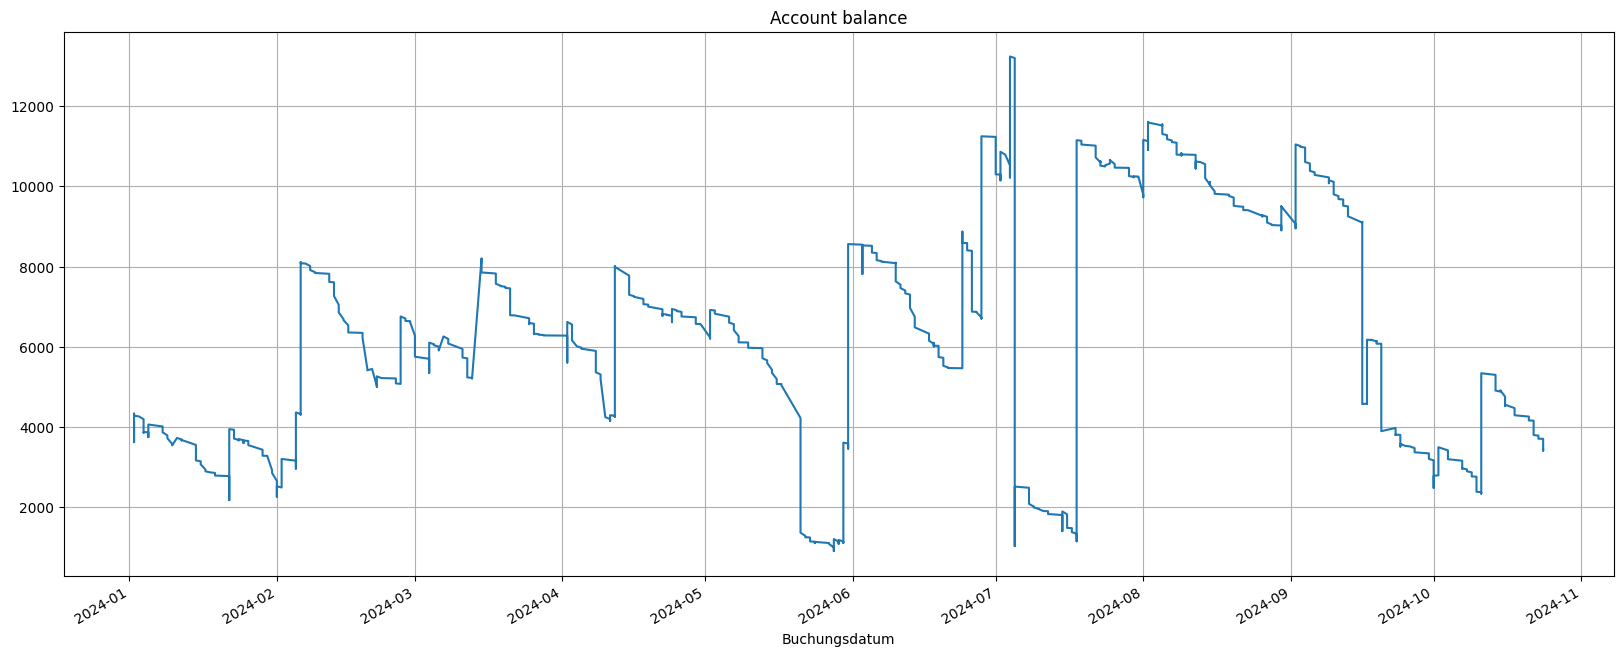

In [19]:
data[balance].plot(
    title='Account balance',
    grid=True,
    figsize=(20,8)
);

## Breakdown by transaction party

In [20]:
print(data.groupby(party).agg({amount:"sum"}))
print(data)
empfgroup = data.groupby(party).agg({amount:"sum"})

                                                    Betrag (€)
Zahlungsempfänger*in                                          
213 - MAXI 470                                          -17.12
213...MAXI.470/CACAK                                    -16.49
214...TEMPO.005/CACAK                                   -32.07
305.HARRRISON.ST.SP/Seattle                             -76.88
7-Eleven                                                 -2.58
...                                                        ...
backWerk                                                 -1.60
dm-drogerie                                            -558.87
eprimo GmbH                                    ...     -129.00
tegut                                                   -27.80
vtours GmbH                                             -68.00

[267 rows x 1 columns]
              Wertstellung   Status  \
Buchungsdatum                         
2024-01-02        02.01.24  Gebucht   
2024-01-02        02.01.24  Gebucht   
2

In [21]:
# Short the names
empfgroup.index = [str(i)[:30] for i in empfgroup.index]

In [22]:
empfgroup[amount].head()


213 - MAXI 470                -17.12
213...MAXI.470/CACAK          -16.49
214...TEMPO.005/CACAK         -32.07
305.HARRRISON.ST.SP/Seattle   -76.88
7-Eleven                       -2.58
Name: Betrag (€), dtype: float64

In [23]:
empfgroup = empfgroup.sort_values(amount,ascending=False)
gutschrift = empfgroup[amount] > 0
colors = list( map(lambda x: "g" if x else "r" , gutschrift) )

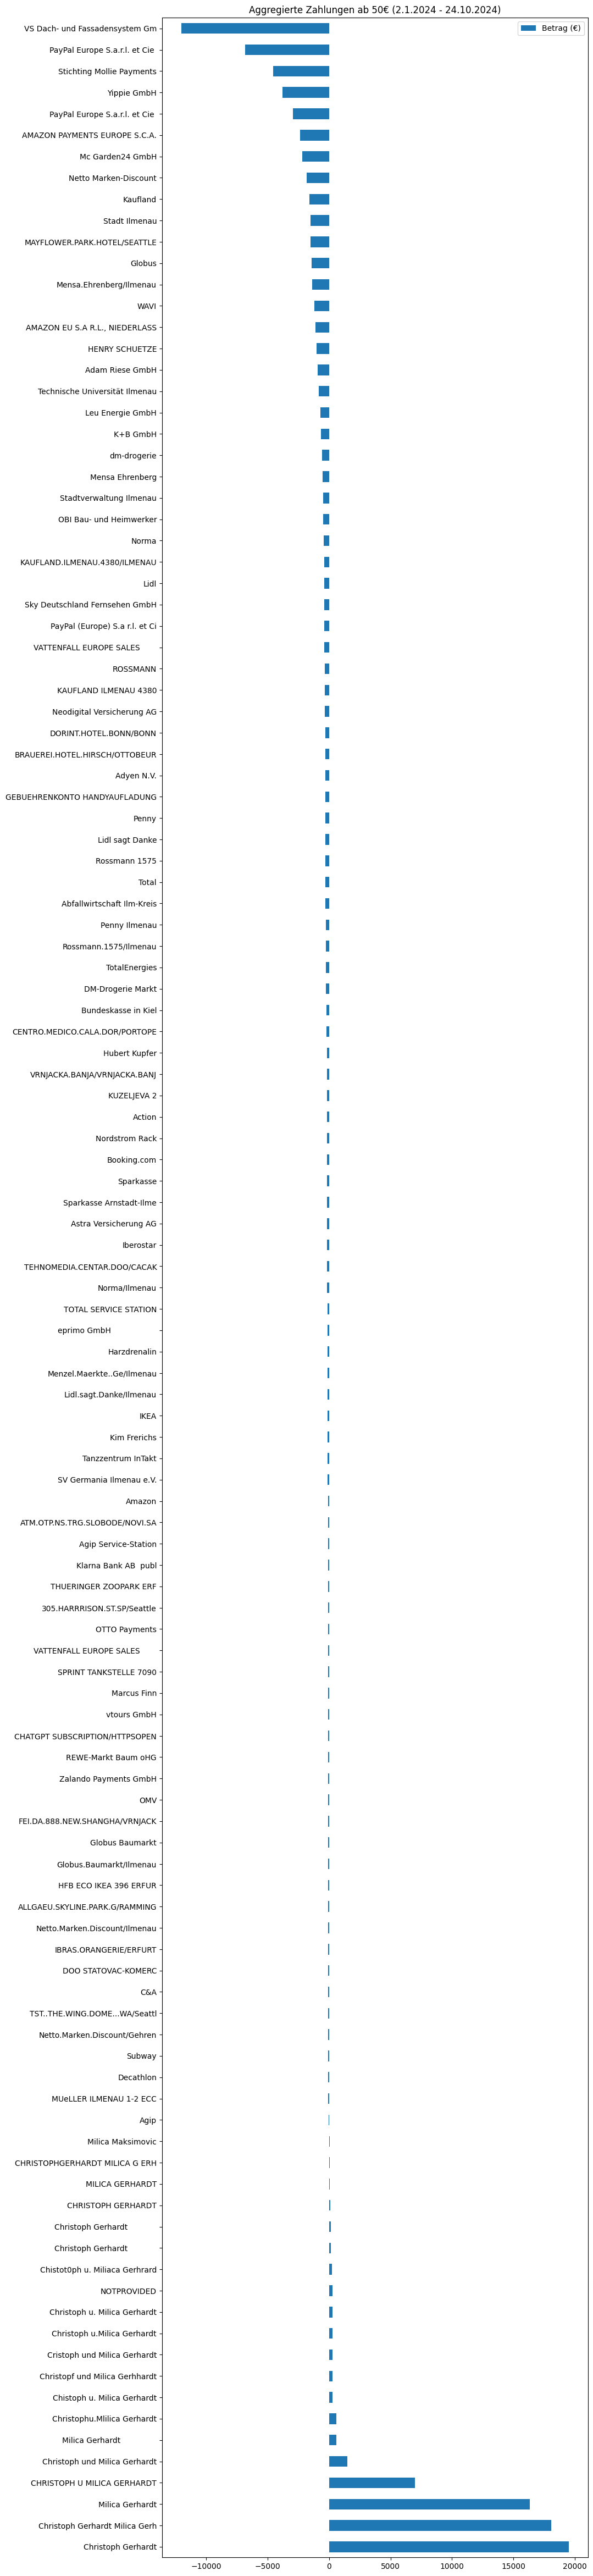

In [24]:
empfgroup[empfgroup[amount].abs() > 50].plot.barh(
    figsize=(10,60),
    title=u'Aggregierte Zahlungen ab 50€ (%i.%i.%i - %i.%i.%i)' % (fr.day, fr.month, fr.year, to.day, to.month, to.year)
  );

In [25]:
data.head()

,Wertstellung,Status,Zahlungspflichtige*r,Zahlungsempfänger*in,Verwendungszweck,Umsatztyp,IBAN,Betrag (€),Gläubiger-ID,Mandatsreferenz,Kundenreferenz,Kontostand (EUR)
Buchungsdatum,,,,,,,,,,,,
2024-01-02,02.01.24,Gebucht,Christoph Gerhardt Milica Gerhardt,Leu Energie GmbH,138018791,Ausgang,DE73780608960102510510,-350.00,NaN,NaN,938026113,4118.63
2024-01-02,02.01.24,Gebucht,Christoph Gerhardt,Yippie GmbH,Abschlag (Gas) Dezember / 2023 Kunden-Nr. 6000...,Ausgang,DE52506521240026142141,-334.00,DE73ZZZ00002384370,-600075380-900081364-1,A1.600075380.900081364.32441844,3784.63
2024-01-02,02.01.24,Gebucht,ISSUER,C.A Haus 0547,VISA Debitkartenumsatz,Ausgang,DE96120300009005290904,-6.99,NaN,NaN,483363645144136,3777.64
2024-01-02,02.01.24,Gebucht,Milica Gerhardt,Astra Versicherung AG,"Kundennr: 27552, Rechnungsnr: 954351, Zahnzusa...",Ausgang,DE67545500100193238029,-14.91,DE45ZZZ00001921408,27552,ADVTXN969130,3762.73
2024-01-02,02.01.24,Gebucht,AMAZON PAYMENTS EUROPE S.C.A. ...,Milica Gerhardt ...,303-8174271-4781949 AMZN Mktp DE 1D8LD4ROIPH6SCC0,Eingang,DE87300308801908262006,57.96,NaN,NaN,1D8LD4ROIPH6SCC0,3820.69


## Breakdown by Category
We use some heuristics on the tranasaction details to put them into different categories.
All transactions within a category will be aggregated for a better overall analysis.
You may need to check the print output of the next cell and possibly adapt the mapping function for a better categorisation.

**the text will be lower cased before categorisation**

**Feel free to change these heuristic mappings - or adapt the code to map according to specififc transaction details.**

In [40]:

categories = {
    "Gastronomie": [
        "restaurant",
        "gastro",
        "dean david",
        "cafe",
        "baeckerei",
        "coffee fellows",
        "jim block",
        "don qui",
        "Osteria",
        "subway",
        "backhaus",
        "burger king",
        "campus suite",
        "juice.more",
        "Back",
        "Avni Terhani",
        "vegan",
        "thai",
        "indisch",
        "schortemuehle",
        "metzgerei",
        "kantine",
        "kaffee",
        "backshop",
        "bistro",
        "imbiss",
        "pizza",
        "baecker", 
        "bäcker",    
        "ibras",
        "ditsch",
        "kfc",
        "mcdonald",
        "starbucks",
        "vapiano",
        "nordsee",
        "block house",
        "food",
        "catering"
        "coffee",
        "beer",
        "eismanufaktur",
        "bar",
        "schoko",
        
    ],
    "Dienstreisen": [
        "bonn",
        "seattle",
        "dienstreise",
        "shake shack",
        "scoom",
        "orca",
        "7-eleven",
        "walgreens",
    ],
    "Supermarkt": [
        "lidl",
        "aldi",
        "edeka",
        "alnatura",
        "rewe",
        "norma",
        "netto",
        "kaufland",
        "penny",
        "tegut",
        "maerkte",
    ],
    "Drogerie": [
        "mueller",
        "müller",
        "rossmann",
        "dm",
        "action",
        "douglas",
        "parfuemerie",
        "maec geiz",
        "mäc geiz",
        "mc pfennig",
    ],
    "Baumarkt": [
        "bauhaus",
        "obi",
        "hornbach",
        "hellweg",
        "toom",
        "globus",
        "mano",
        "pro shop",
        "glas strack",
    ],
    "Online Shopping":[
        "otto",
        "conrad elec",
        "amzn mktp",
        "amazon",
        "zalando",
        "ebay",
        "aliexpress",
        "asics",
    ],
    "Transport": [
        "FERNVERKEHR",
        "flixbus",
        "bahn",
        "PAYPAL .DBVERTR",
    ],
    "Reise": [
        "booking",
        "hotel",
        "airbnb",
        "mallorca",
        "iberostar",
        "ryanair",
        "airport",
        "easyjet",
        "lufthansa",
        "airberlin",
        "tuifly",
        "eurowings",
        "cala",
        "spain",
        "allgaeu",
        "wizz",
        "fly",
        "fraport",
        "petro",
        "palma",
        "madrid",
        "balear",
        "santanyi",
        "portal interactiv",
        
    ],
    "Serbien": [
        "serbia",
        "komerc",
        "maxi",
        "gornji",
        "rs",
        "serbien",
        "belgrad",
        "beograd",
        "nbg",
        "novi",
        "kragujevac",
        "kraljevo",
        "krusevac",
        "nis",
        "cacak",
        "banj",
        "lilly",
        "jeva"
    ],  
    "Ausflug":[
        "zoo",
        "tierpark",
        "schwimmbad",
        "therme"
        "ega",
        "freizeitpark",
        "kino",
        "lichtspiele",
        "theater",
        "schwimmhalle",
        "harz",
        "hochseilgarten",
        "kletterpark",
        "wernigerode",
        "freibad",
        "geiselwind",
        "brocken",
        ],
    
    "Project": [
        "openai",
        "google.cloud",
        "github",
    ],
    
    "Hobby": [
        "germania",
        "tanz",
    ],
    "Unterhaltung": [
        "magellan",
        "Amazon Prime",
        "paypal .steam",
        "netflix",
        "spotify",
        "sky",
        "disney",
        "adyen",
    ],
    "Gesundheit": [
        "apotheke",
        "krankenversicherung",
        "krank",
        "arzt",
    ],
    "Bargeld": [
        "bargeld",
        "automat",
        "cash"
    ],
    "DKB": [
        "DKB",
        "KREDITBANK",
    ],
    "Kleidung":[
        "tk maxx",
        "deichmann",
        "primark",
        "h.m",
        "h.amp.m",        
        "c&a",
        "kik",
        "decathlon",
        "takko",
        "ernsting",
    ],
    "Möbel":[
        "ikea",
        "moebel",
        "moebelhaus",
        "roller",
        "xxxl",
        "poco",
        "porta",
        "sconto",
        "k+b",
    ],
    "Haus und Garten":[
        "vs",
        "mollie",
        "mc garden",
    ],
    "Nebenkosten": [
        "Kredit", 
        "Gebäude",
        "Abfall",
        "wavi",
        "hubert kupfer"
        ],
    "Energie":[
        "leu", 
        "eprimo",
        "yippie",
        "vattenfall",
    ],
    "Versicherung":[
        "astra",
        "adam riese",
        "neodigital"
    ],
    "Auto":[
        "aral",
        "total",
        "agip",
        "tank",
        "omv",
        "kfz",
    ],
    "Mobilfunk":["handyaufladung"
    ],
    "Kita": [
        "kita",
        "stadt ilmenau",
        "stadtverwaltung ilmenau",
    ],
    "Mittagessen": ["mensa", "henry schuetze"], 
    "investment": [],
    "emergency_fund":[],
    "Paypal": ["paypal"],
    "card_payment": [],
    "Sonstiges": [ # populated automatically
    ]
}

def mapToCategory(x):
    # use these transaction details to map to a category
    p = x[party].lower()
    pt = x[posting_text].lower()
    c = x[cause].lower()
    
    # manual mappings
    if "WERTP. ABRECHN".lower() in c or "Depot ".lower() in c or "WERTPAPIER".lower() in c:
        return "investment"
    
    if "miete ".lower() in c:
        return "miete"
    
    if "KREDITKARTENABRECHNUNG".lower() in c:
        return "card_payment"
    
    # mappings by category
    for cat, cat_words in categories.items():
        if any(map(lambda r: r.lower() in p, cat_words)) or any(map(lambda r: r.lower() in pt, cat_words)):
            return cat
    
    # debitcard. may need adaptation
    if "Debitk.20 VISA Debit".lower() in c:
        return "card_payment"
    
    return p

data[category] = data.apply(lambda x: mapToCategory(x), axis=1)

print(len(data[category].unique()),"categories")

print("============ uncategorized =================")
s = 0
for x in data[category].unique():
    ok = False
    
    for cat in categories.keys():
        if x == cat:
            ok = True

    if not ok:
        print(x)
        idx = data[category] == x
        s = s + abs(data[idx][amount].sum())
        

60 categories
============ uncategorized =================
c.a haus 0547
nya.kiddie spieler
christoph gerhardt
christoph u milica gerhardt
milica gerhardt
chistot0ph u. miliaca gerhrardt
c.a haus 0301
christoph gerhardt milica gerhardt
klarna
christoph und milica gerhardt
vb thueringen mitte
sparkasse mittelthuerin
sumup .trobnitzer getr
sparkasse arnstadt-ilme
aut.eichhorn.oliver/ilmenau
christopf und milica gerhhardt
park..und.sportcaterin/erfurt
sparkasse
cristoph und milica gerhardt
maloa poke erfu - sumup
christoph u.milica gerhardt
fddb.premium/bremen
mäc-geiz
chistoph u. milica gerhardt
park..u..sportcatering/erfurt
rad.art.ilmenau/ilmenau
kasse2/erfurt
zettle..thuringer.wald/eisfeld.ot.fr
kim frerichs
klarna bank ab  publ
christophu.mlilica gerhardt
bhmm.vkm/memmingen
world duty free
christoph u. milica gerhardt
pvz-stockelsdorf
lagardere
schmitze.lange/koln
haribo.service.gmbh/grafschaft


Breakdown by category. (Ignored transactions below 10€).

/tmp/ipykernel_5679/837855691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  costs.loc[:, amount] = -costs[amount]


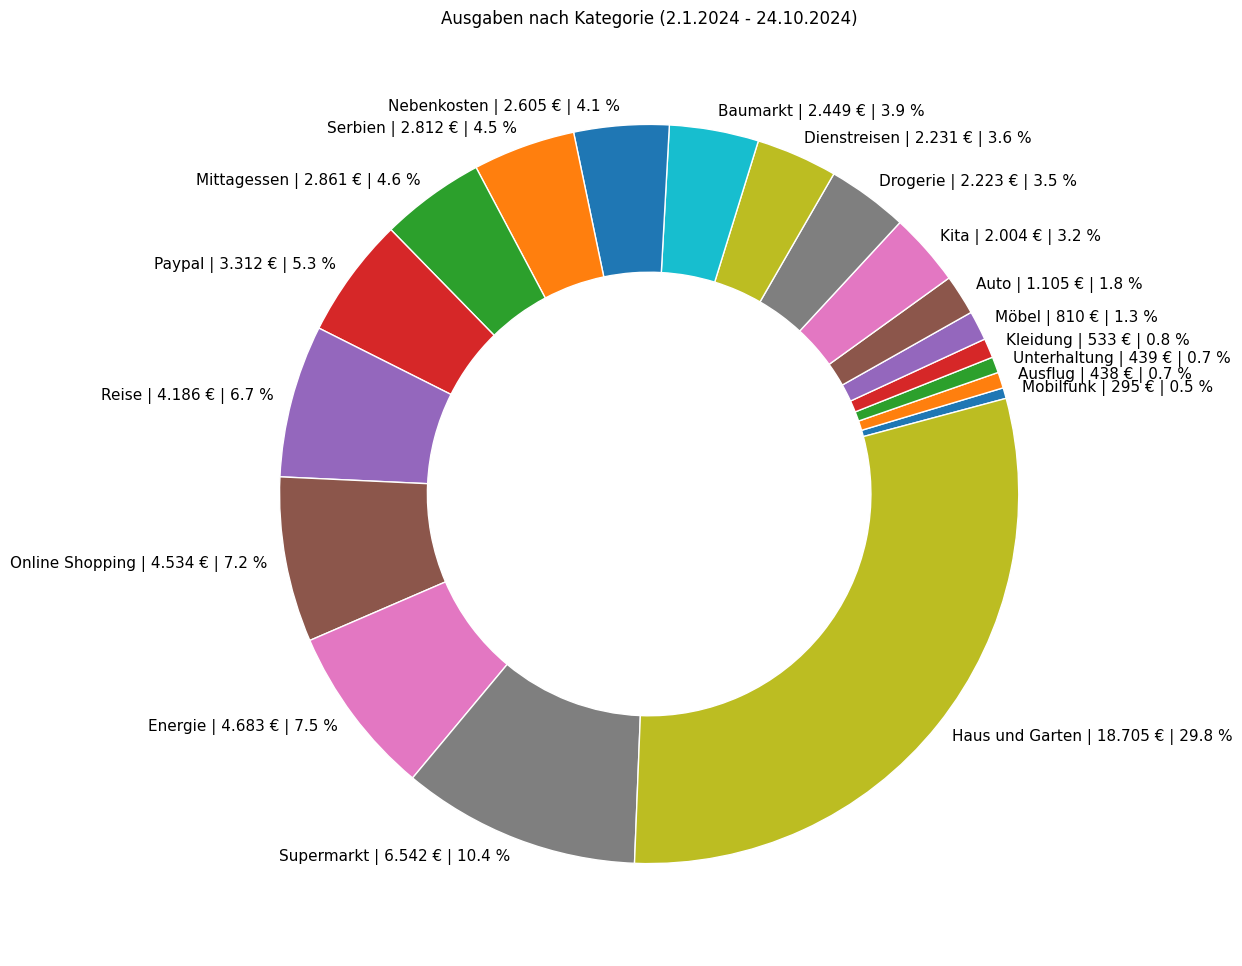

In [27]:
byCategory = data.groupby(category).agg({amount:"sum"}).sort_values(amount,ascending=False)
byCategory = byCategory[abs(byCategory[amount]) > 200]
    
costs = byCategory[byCategory[amount] < 0]
costs.loc[:, amount] = -costs[amount]

total_costs = costs[amount].sum()
costs.plot.pie(
    figsize=(12,12),
    y=amount,
    legend=None,
    ylabel="",
    # autopct='%1.1f%%',
    title=u'Ausgaben nach Kategorie (%i.%i.%i - %i.%i.%i)' % (fr.day, fr.month, fr.year, to.day, to.month, to.year),
    startangle=15,  # Rotate the start of the pie chart
    wedgeprops={'edgecolor': 'white', 'width':0.4},  # Add edge color for better readability
    textprops={'fontsize': 11},  # Increase font size for better readability
    labels=[f"{label} | {int(value):n} € | {round(value/total_costs*100,1)} %" for label, value in zip(costs.index, costs[amount])],
    # pctdistance=1.1,  # Position the percentage labels closer to the center
    labeldistance=1.05,  # Position the category labels further from the center
)
# Draw a circle at the center to make it a donut chart
# centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

plt.show()

# byCategory[byCategory[amount] > 0].plot.pie(
#     figsize=(12,12),
#     y=amount,
#     legend=None,
#     title=u'Nach Kategorie Aggregiertes Einkommen (%i.%i.%i - %i.%i.%i)' % (fr.day, fr.month, fr.year, to.day, to.month, to.year)
# )
# plt.show()


# byCategory.plot.barh(
#     figsize=(6,40),
#     grid=True,
#     title=u'Nach Kategorie Aggregierte Zahlungen (%i.%i.%i - %i.%i.%i)' % (fr.day, fr.month, fr.year, to.day, to.month, to.year)
# )
# plt.show()


### Category analysis

In [28]:
def quick_category_analyse(cat,desc=party):
    excursions = data[data[category] == cat].sort_values(amount,ascending=True)

    excursions.plot.barh(
        figsize=(12,12),
        x=desc,
        y=amount,
        legend=None,
    )
    plt.show()

    return excursions

IndexError: index 0 is out of bounds for axis 0 with size 0

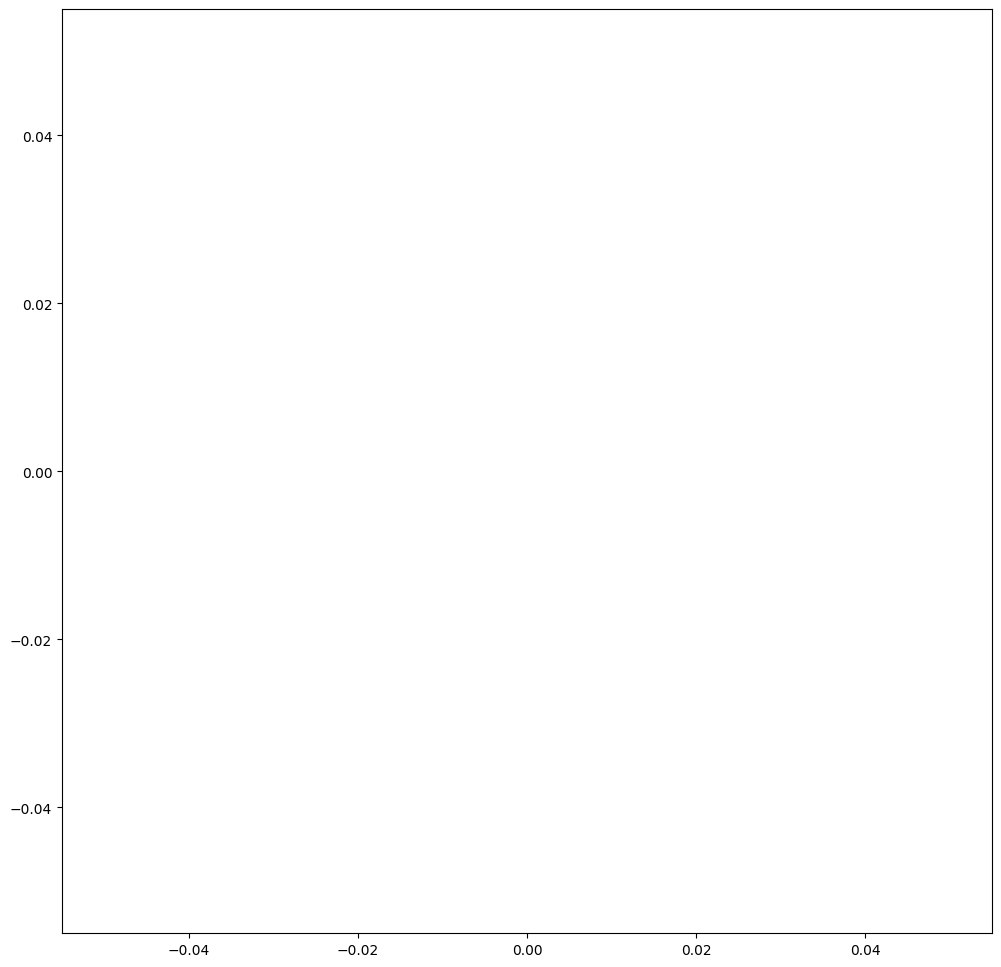

In [29]:
quick_category_analyse("investment",desc=cause)

IndexError: index 0 is out of bounds for axis 0 with size 0

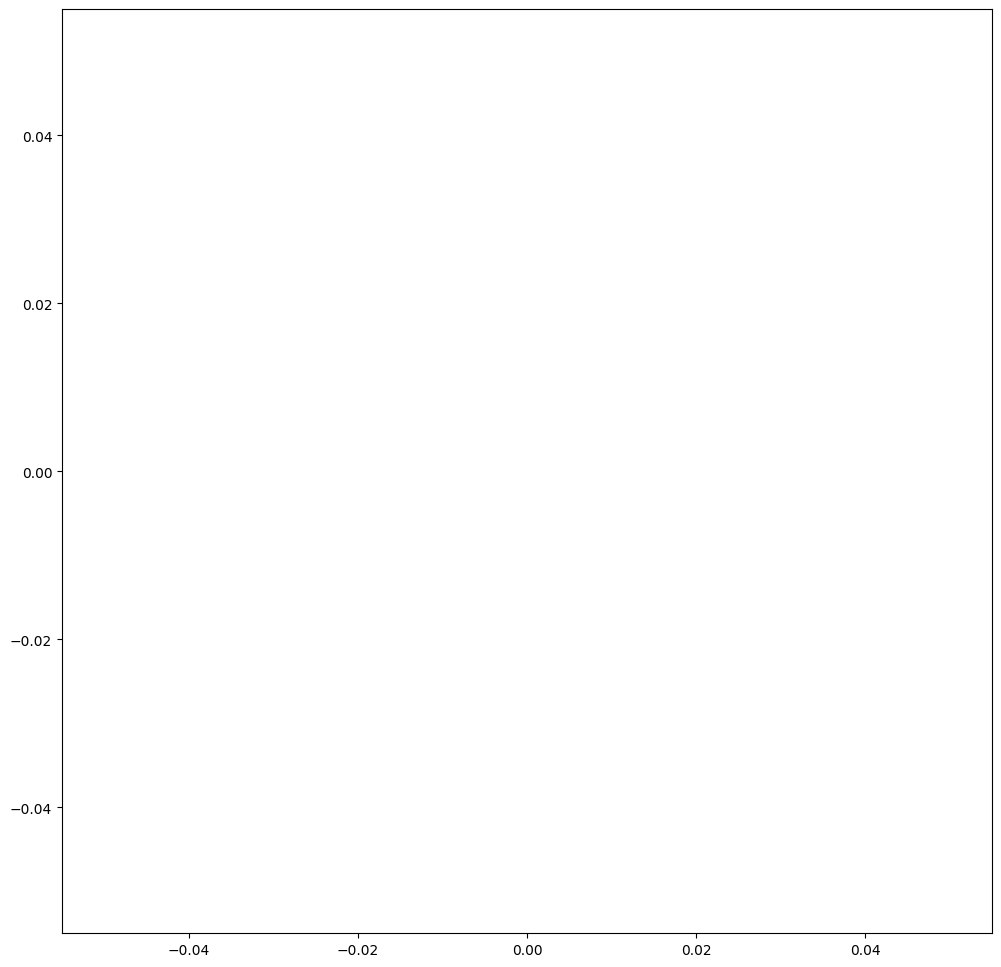

In [30]:
quick_category_analyse("dkb", desc=cause)

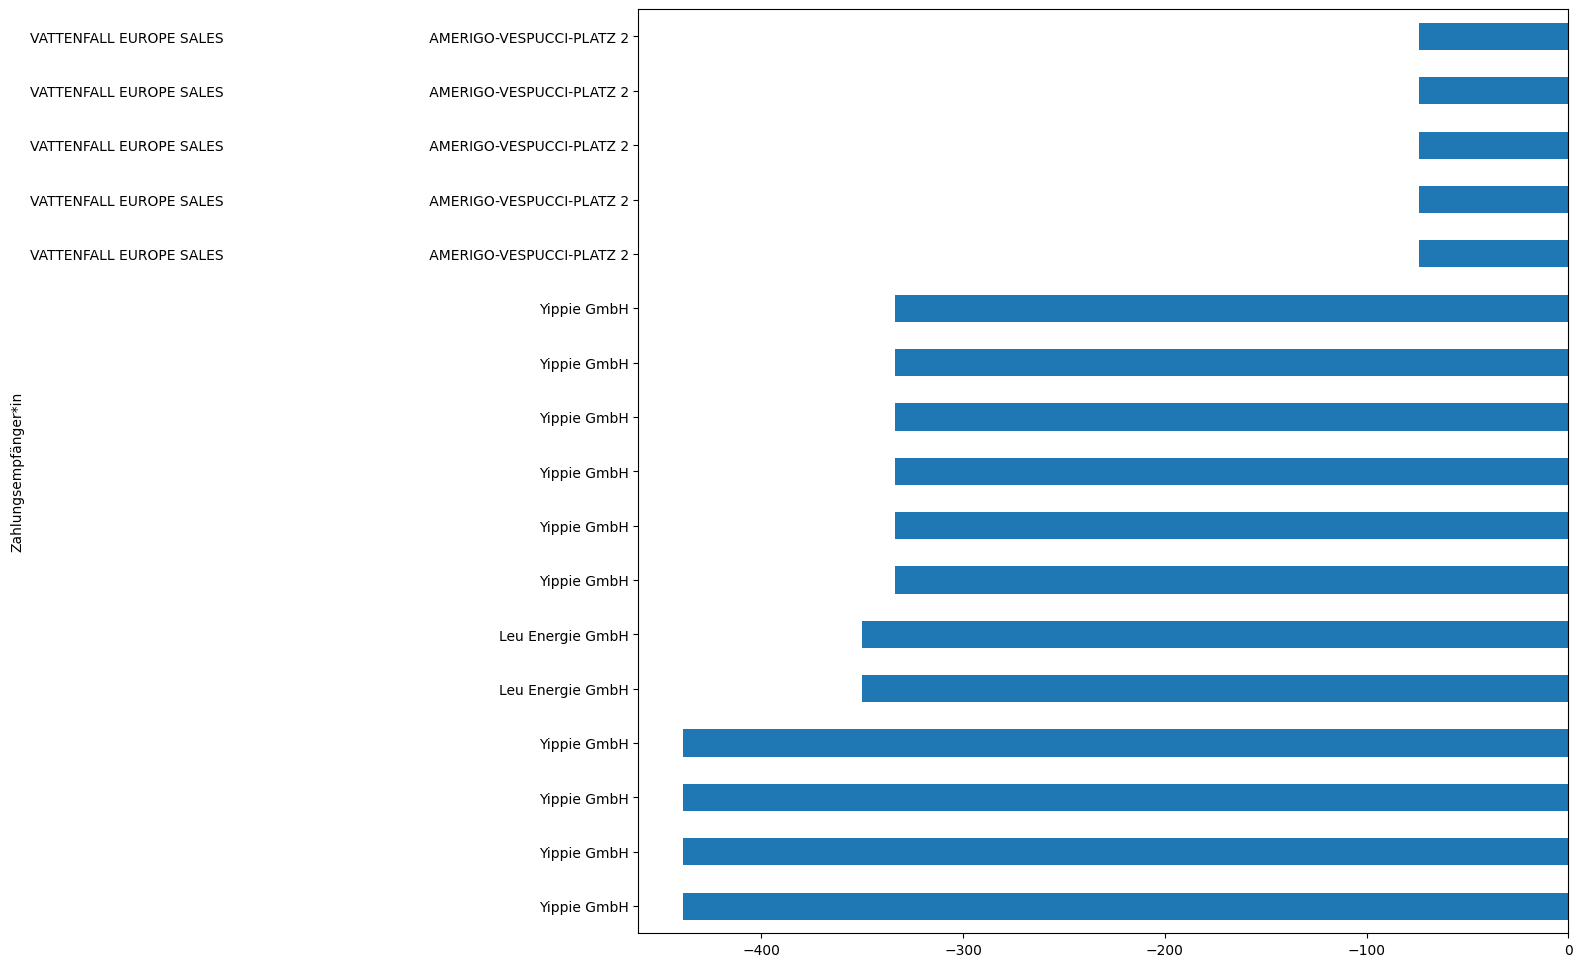

,Wertstellung,Status,Zahlungspflichtige*r,Zahlungsempfänger*in,Verwendungszweck,Umsatztyp,IBAN,Betrag (€),Gläubiger-ID,Mandatsreferenz,Kundenreferenz,Kontostand (EUR),Kategorie
Buchungsdatum,,,,,,,,,,,,,
2024-10-01,01.10.24,Gebucht,Christoph Gerhardt,Yippie GmbH,Abschlag (Gas) September / 2024 Kunden-Nr. 600...,Ausgang,DE52506521240026142141,-439.0,DE73ZZZ00002384370,-600075380-900081364-1,A1.600075380.900081364.33066433,2482.83,Energie
2024-07-01,01.07.24,Gebucht,Christoph Gerhardt,Yippie GmbH,Abschlag (Gas) Juni / 2024 Kunden-Nr. 60007538...,Ausgang,DE52506521240026142141,-439.0,DE73ZZZ00002384370,-600075380-900081364-1,A1.600075380.900081364.32831091,10794.09,Energie
2024-08-01,01.08.24,Gebucht,Christoph Gerhardt,Yippie GmbH,Abschlag (Gas) Juli / 2024 Kunden-Nr. 60007538...,Ausgang,DE52506521240026142141,-439.0,DE73ZZZ00002384370,-600075380-900081364-1,A1.600075380.900081364.32914012,9791.91,Energie
2024-09-02,02.09.24,Gebucht,Christoph Gerhardt,Yippie GmbH,Abschlag (Gas) August / 2024 Kunden-Nr. 600075...,Ausgang,DE52506521240026142141,-439.0,DE73ZZZ00002384370,-600075380-900081364-1,A1.600075380.900081364.32991494,9061.67,Energie
2024-01-02,02.01.24,Gebucht,Christoph Gerhardt Milica Gerhardt,Leu Energie GmbH,138018791,Ausgang,DE73780608960102510510,-350.0,NaN,NaN,938026113,4118.63,Energie
2024-01-31,31.01.24,Gebucht,Christoph Gerhardt Milica Gerhardt,Leu Energie GmbH,138018791,Ausgang,DE73780608960102510510,-350.0,NaN,NaN,938026113,2918.84,Energie
2024-01-02,02.01.24,Gebucht,Christoph Gerhardt,Yippie GmbH,Abschlag (Gas) Dezember / 2023 Kunden-Nr. 6000...,Ausgang,DE52506521240026142141,-334.0,DE73ZZZ00002384370,-600075380-900081364-1,A1.600075380.900081364.32441844,3784.63,Energie
2024-02-01,01.02.24,Gebucht,Christoph Gerhardt,Yippie GmbH,Abschlag (Gas) Januar / 2024 Kunden-Nr. 600075...,Ausgang,DE52506521240026142141,-334.0,DE73ZZZ00002384370,-600075380-900081364-1,A1.600075380.900081364.32506063,2321.60,Energie
2024-03-01,01.03.24,Gebucht,Christoph Gerhardt,Yippie GmbH,Abschlag (Gas) Februar / 2024 Kunden-Nr. 60007...,Ausgang,DE52506521240026142141,-334.0,DE73ZZZ00002384370,-600075380-900081364-1,A1.600075380.900081364.32555656,6276.97,Energie


In [38]:
quick_category_analyse("Energie")

/home/chge7185/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


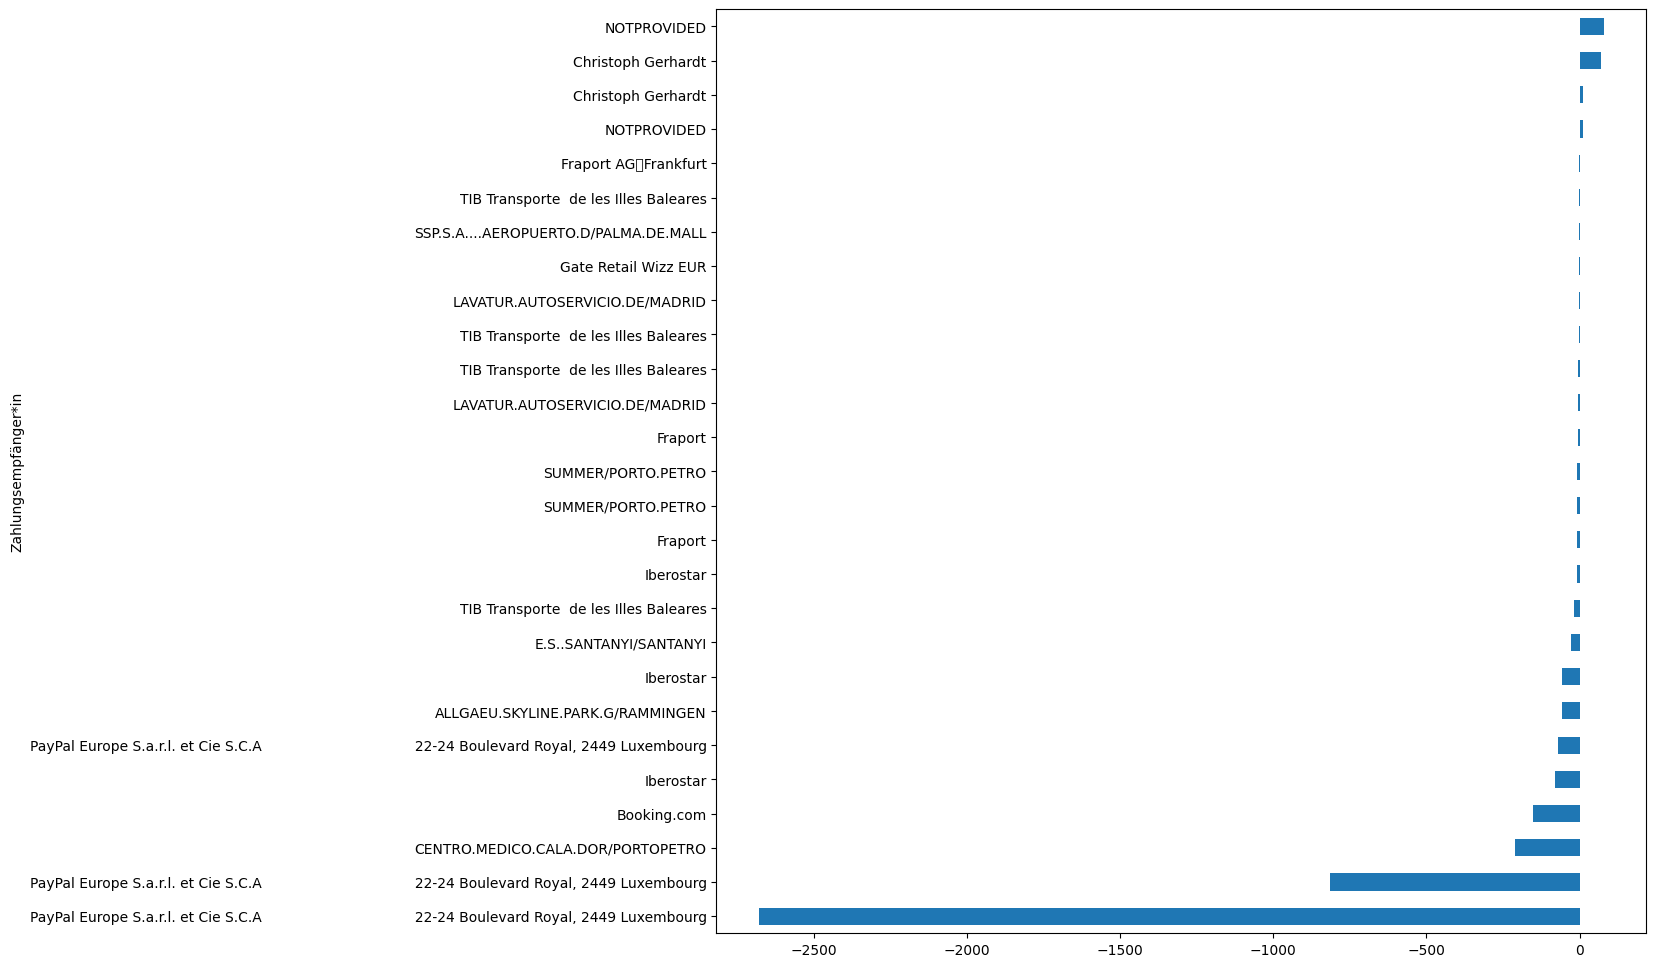

,Wertstellung,Status,Zahlungspflichtige*r,Zahlungsempfänger*in,Verwendungszweck,Umsatztyp,IBAN,Betrag (€),Gläubiger-ID,Mandatsreferenz,Kundenreferenz,Kontostand (EUR),Kategorie
Buchungsdatum,,,,,,,,,,,,,
2024-05-21,21.05.24,Gebucht,Christoph Gerhardt ...,PayPal Europe S.a.r.l. et Cie S.C.A ...,1034469398224/PP.9570.PP/. PORTAL INTERACTIV S...,Ausgang,LU89751000135104200E,-2680.17,LU96ZZZ0000000000000000058,5562224VZK6UA,1034469398224,1543.00,Reise
2024-05-21,21.05.24,Gebucht,Christoph Gerhardt ...,PayPal Europe S.a.r.l. et Cie S.C.A ...,"1034448887594/PP.9570.PP/. Ryanair Limited, Ih...",Ausgang,LU89751000135104200E,-814.68,LU96ZZZ0000000000000000058,5562224VZK6UA,1034448887594,4223.17,Reise
2024-09-13,13.09.24,Gebucht,ISSUER,CENTRO.MEDICO.CALA.DOR/PORTOPETRO,VISA Debitkartenumsatz,Ausgang,DE96120300009005290904,-210.00,NaN,NaN,484256414878783,9290.05,Reise
2024-06-20,20.06.24,Gebucht,ISSUER,Booking.com,VISA Debitkartenumsatz,Ausgang,DE96120300009005290904,-152.01,NaN,NaN,484171447642221,5571.91,Reise
2024-09-12,12.09.24,Gebucht,ISSUER,Iberostar,VISA Debitkartenumsatz,Ausgang,DE96120300009005290904,-80.00,NaN,NaN,484255598868056,9591.60,Reise
2024-08-20,20.08.24,Gebucht,Christoph Gerhardt ...,PayPal Europe S.a.r.l. et Cie S.C.A ...,1036379398413/PP.9570.PP/. FLYERALARM sports G...,Ausgang,LU89751000135104200E,-71.24,LU96ZZZ0000000000000000058,5562224VZK6UA,1036379398413,9564.19,Reise
2024-09-11,11.09.24,Gebucht,ISSUER,ALLGAEU.SKYLINE.PARK.G/RAMMINGEN,VISA Debitkartenumsatz,Ausgang,DE96120300009005290904,-58.00,NaN,NaN,484254308463788,9699.10,Reise
2024-09-12,12.09.24,Gebucht,ISSUER,Iberostar,VISA Debitkartenumsatz,Ausgang,DE96120300009005290904,-56.10,NaN,NaN,484255597890834,9535.50,Reise
2024-09-13,13.09.24,Gebucht,ISSUER,E.S..SANTANYI/SANTANYI,VISA Debitkartenumsatz,Ausgang,DE96120300009005290904,-29.50,NaN,NaN,484256676340261,9260.55,Reise


In [39]:
quick_category_analyse("Reise")